In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('sales.csv')


In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
list(df.columns)

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [9]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
df = df.drop(columns='Invoice ID')

In [14]:
df = df.drop(columns='gross margin percentage')

In [15]:
df = df.drop(columns='Date')

In [16]:
df = df.drop(columns='Time')

In [17]:
for column in ['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']:
    (df[column]-df[column].mean())/df[column].std()
normalized_df = df

In [18]:
normalized_df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,3.2910,4.1


In [19]:
le_branch = preprocessing.LabelEncoder()
normalized_df['Branch'] = le_branch.fit_transform(normalized_df['Branch'])


In [20]:

le_gender = preprocessing.LabelEncoder()
normalized_df['Gender'] = le_gender.fit_transform(normalized_df['Gender'])
le_city = preprocessing.LabelEncoder()
normalized_df['City'] = le_city.fit_transform(normalized_df['City'])
le_payment = preprocessing.LabelEncoder()
normalized_df['Payment'] = le_payment.fit_transform(normalized_df['Payment'])

In [21]:
le_customer_type = preprocessing.LabelEncoder()
normalized_df['Customer type'] = le_customer_type.fit_transform(normalized_df['Customer type'])

In [22]:
le_product = preprocessing.LabelEncoder()
normalized_df['Product line'] = le_product.fit_transform(normalized_df['Product line'])

In [23]:
normalized_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,30.2085,5.3


#### Defining X and Y

In [24]:
y=normalized_df['Customer type']
x=normalized_df.drop('Customer type',axis=1)

In [25]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Customer type, dtype: int32

#### Spliting data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [27]:
x_train.head()

,Branch,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
687,0,2,1,4,63.56,10,31.7800,667.3800,0,635.60,31.7800,4.3
500,1,0,1,5,73.97,1,3.6985,77.6685,1,73.97,3.6985,5.4
332,0,2,1,1,77.02,5,19.2550,404.3550,0,385.10,19.2550,5.5
979,1,0,0,2,67.77,1,3.3885,71.1585,1,67.77,3.3885,6.5
817,0,2,1,2,33.88,8,13.5520,284.5920,2,271.04,13.5520,9.6


In [28]:
y_train.head()

687    0
500    0
332    1
979    1
817    1
Name: Customer type, dtype: int32

### Model Implementation

### Knn

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.47      0.56      0.51        99
           1       0.48      0.40      0.43       101

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



In [31]:
print(confusion_matrix(y_test,y_pred))


[[55 44]
 [61 40]]


In [32]:
print("Training Accuracy",knn.score(x_train,y_train)*100)

Training Accuracy 64.5


### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [34]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(classification_report(y_test,y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print("Training Accuracy",dtree.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.48      0.64      0.55        99
           1       0.49      0.34      0.40       101

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.47       200
weighted avg       0.49      0.48      0.47       200

Confusion Matrix
[[63 36]
 [67 34]]
Training Accuracy 58.62500000000001


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Accuracy",rfc.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.46      0.52      0.48        99
           1       0.45      0.40      0.42       101

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.45      0.46      0.45       200

Confusion Matrix:
 [[51 48]
 [61 40]]
Training Accuracy 100.0


### ADA Boost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [38]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(classification_report(y_test,y_pred))
print("Confusion Matrix for ADA Boost:\n",confusion_matrix(y_test,y_pred))
print("Training Accuracy",adb.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.51      0.47      0.49        99
           1       0.52      0.55      0.54       101

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200

Confusion Matrix for ADA Boost:
 [[47 52]
 [45 56]]
Training Accuracy 65.75


###  Cross validation for 4 models Knn , Decision Tree , Random Forest and ADA Boost

In [52]:
from sklearn.model_selection import KFold 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits=10, random_state=None) 
xyz=[]
accuracy=[]
std=[]
classifiers=['knn','Decision Tree','random forest','ada boost']
models = [knn,dtree,rfc,adb]

for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

,CV Mean,Std
knn,0.462,0.025612
Decision Tree,0.481,0.062201
random forest,0.471,0.046357
ada boost,0.494,0.044542


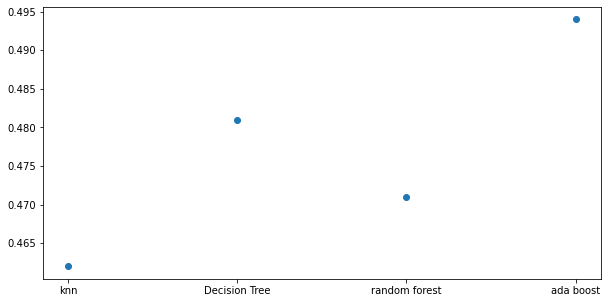

In [54]:
plt.figure(figsize = (10, 5))
plt.scatter(classifiers,xyz)
plt.show()

### Accuracy graph

In [43]:
a=knn.score(x_train,y_train)*100
b=dtree.score(x_train,y_train)*100
c=rfc.score(x_train,y_train)*100
d=adb.score(x_train,y_train)*100


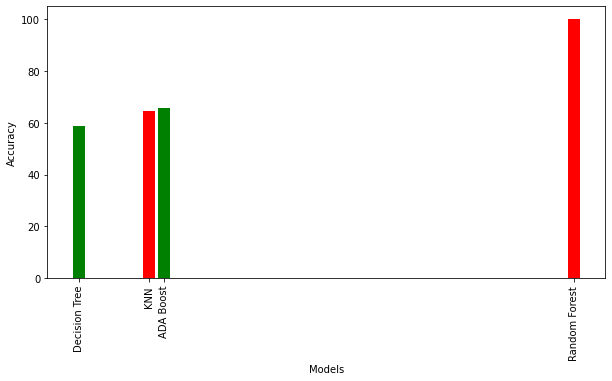

<Figure size 720x360 with 0 Axes>

In [56]:
l= [a,b,c,d]
h = [a,b,c,d]
  
tlabel = ['KNN','Decision Tree','Random Forest','ADA Boost']
plt.bar(l, h, tick_label = tlabel,
        width = 1, color = ['red', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation = 90)
plt.figure(figsize = (10, 5))
plt.show()